In [1]:
import numpy as np

In [2]:
def formula(x):
    if x >= -2000:
        return x
    else:
        return -x - 4000

In [3]:
formula(100)

100

In [6]:
def generate_synthetic_data(n_samples=1000, 
                            start=-5000, 
                            end=5000):
    np.random.seed(42)
    x = np.random.randint(low=start, 
                          high=end, 
                          size=(n_samples,)).astype(int)
    
    y = np.vectorize(formula)(x) + \
        np.random.normal(150, 150, n_samples) 
    
    return (x, y)

In [7]:
X, y = generate_synthetic_data()

In [6]:
X[:10]

array([ 2270, -4140,   390,   191,   734,  1265, -4534,  -574,   578,
        3322])

In [7]:
y[:10]

array([2516.50308966,  524.70568774,  720.7455971 ,  441.86375283,
        789.51925316, 1387.47962696,  634.60894394, -494.54221701,
        667.63233371, 3407.62929474])

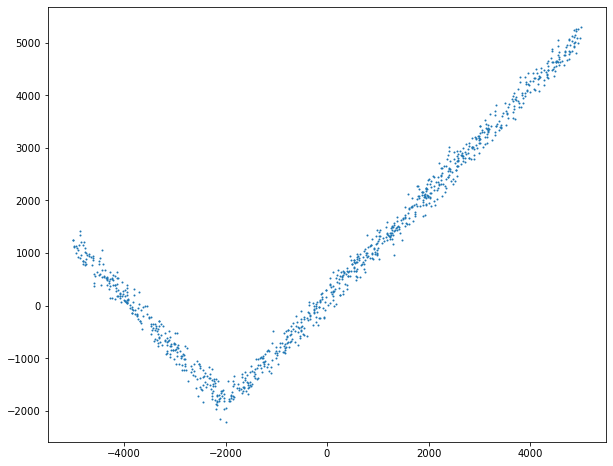

In [8]:
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"] = (10,8)
pyplot.scatter(X,y,s=1)
pyplot.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [10]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(640,)
(160,)
(200,)


In [11]:
!mkdir -p tmp

In [12]:
import pandas as pd

df_all_data = pd.DataFrame({ 'y': y, 'x': X})
df_all_data.to_csv('tmp/all_data.csv', header=False, index=False)

df_training_data = pd.DataFrame({ 'y': y_train, 'x': X_train})
df_training_data.to_csv('tmp/training_data.csv', header=False, index=False)

df_validation_data = pd.DataFrame({ 'y': y_validation, 'x': X_validation})
df_validation_data.to_csv('tmp/validation_data.csv', header=False, index=False)

df_test_data = pd.DataFrame({ 'y': y_test, 'x': X_test})
df_test_data.to_csv('tmp/test_data.csv', header=False, index=False)

In [9]:
s3_bucket = "sagemaker-cookbook-bucket"
prefix = "chapter03"

In [14]:
!aws s3 cp tmp/training_data.csv \
s3://{s3_bucket}/{prefix}/synthetic/all_data.csv

upload: tmp/training_data.csv to s3://sagemaker-cookbook-bucket/chapter03/synthetic/all_data.csv


In [13]:
!aws s3 cp tmp/training_data.csv \
s3://{s3_bucket}/{prefix}/synthetic/training_data.csv

upload: tmp/training_data.csv to s3://sagemaker-cookbook-bucket/chapter03/synthetic/training_data.csv


In [12]:
!aws s3 cp tmp/validation_data.csv \
s3://{s3_bucket}/{prefix}/synthetic/validation_data.csv

upload: tmp/validation_data.csv to s3://sagemaker-cookbook-bucket/chapter03/synthetic/validation_data.csv


In [11]:
!aws s3 cp tmp/test_data.csv \
s3://{s3_bucket}/{prefix}/synthetic/test_data.csv

upload: tmp/test_data.csv to s3://sagemaker-cookbook-bucket/chapter03/synthetic/test_data.csv
